In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

(13, 103)


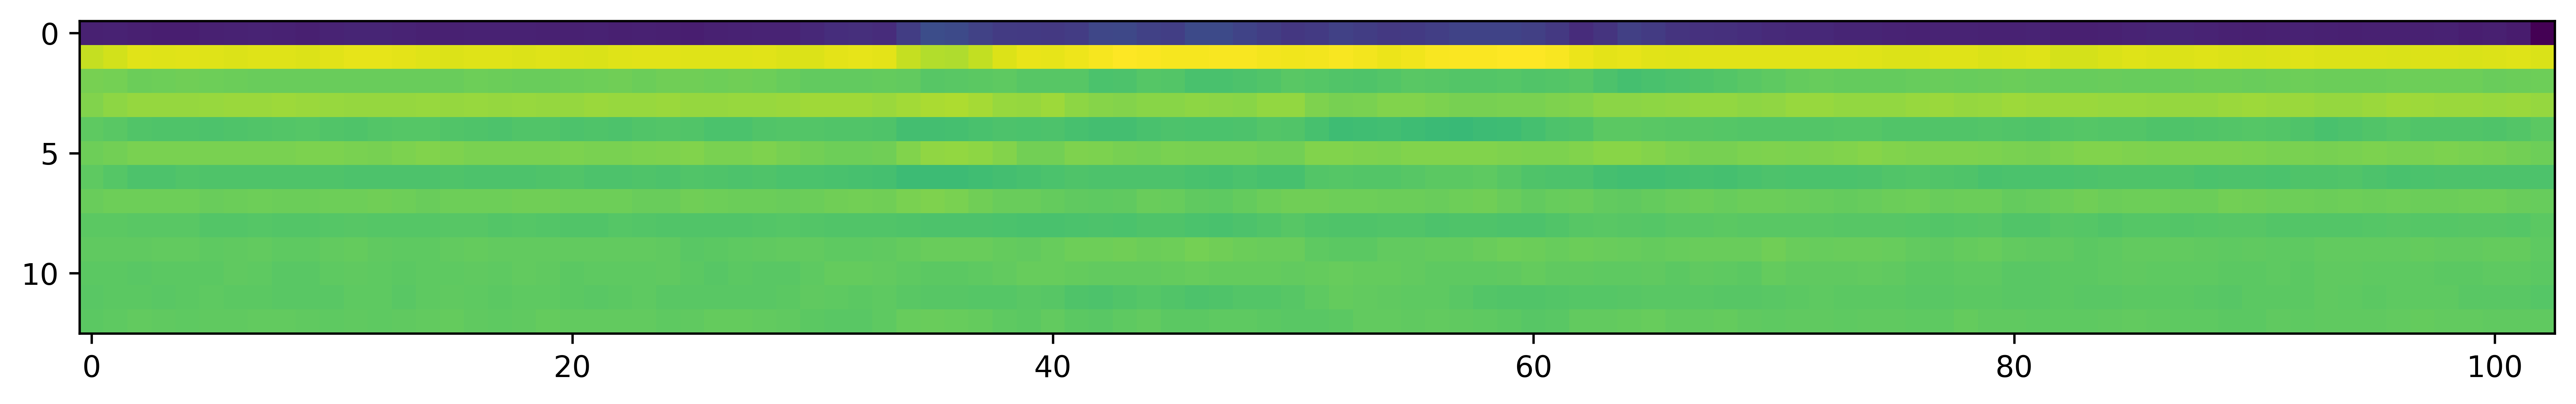

In [3]:
from tqdm import tqdm
import librosa
import matplotlib.pyplot as plt

dum, sdum = librosa.load(train.iloc[0]['path'])
mfcc = librosa.feature.mfcc(y=dum, sr=sdum, n_mfcc=13)
plt.figure(figsize=(15,10), dpi=600)
plt.imshow(mfcc)
print(mfcc.shape)


(13, 126)


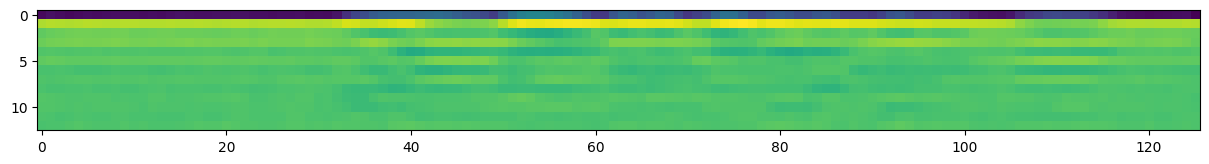

In [13]:
dum, sdum = librosa.load(train.iloc[2]['path'])
mfcc = librosa.feature.mfcc(y=dum, sr=sdum, n_mfcc=13)
plt.figure(figsize=(15,10))
plt.imshow(mfcc)
print(mfcc.shape)

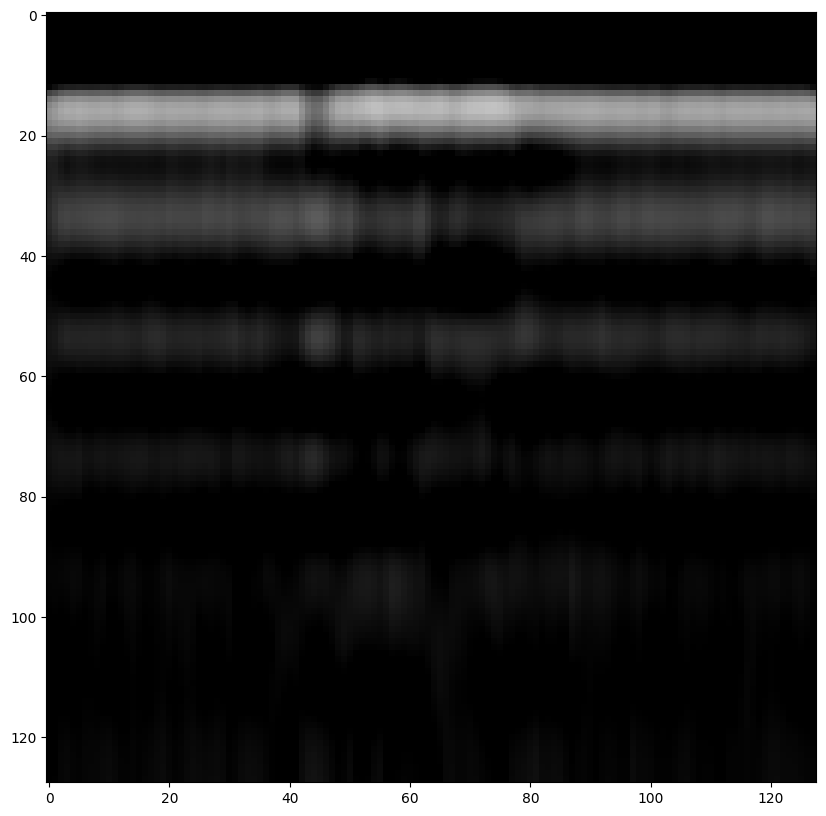

In [22]:
from PIL import Image

resized_image = Image.fromarray(mfcc).resize((128, 128))
plt.figure(figsize=(15,10))
plt.imshow(resized_image)

In [3]:
train['path'] = train['path'].str.replace('train', 'denoise_train')

In [2]:
train

,id,path,label
0,TRAIN_0000,./train/TRAIN_0000.wav,1
1,TRAIN_0001,./train/TRAIN_0001.wav,2
2,TRAIN_0002,./train/TRAIN_0002.wav,4
3,TRAIN_0003,./train/TRAIN_0003.wav,5
4,TRAIN_0004,./train/TRAIN_0004.wav,4
...,...,...,...
4996,TRAIN_4996,./train/TRAIN_4996.wav,5
4997,TRAIN_4997,./train/TRAIN_4997.wav,0
4998,TRAIN_4998,./train/TRAIN_4998.wav,1
4999,TRAIN_4999,./train/TRAIN_4999.wav,1


In [2]:
from glob import glob
import numpy as np
import librosa
import gc

# MFCC 파라미터
n_mfcc = 13


for i, file_path in enumerate(train['path']):
    audio, sr = librosa.load(file_path)

    # MFCC 추출
    mfcc = librosa.feature.mfcc(y = audio, sr=sr, n_mfcc=13)
    
    plt.figure(dpi=600)
    plt.imshow(mfcc)
    plt.axis('off')
    plt.savefig('C:/workplace/dacon/voice/train_image/' + file_path.split('/')[-1].replace('.wav', '.png'), bbox_inches = 'tight', pad_inches=0)
    plt.close()
    if i == 500:
        gc.collect()


In [3]:
from glob import glob
import numpy as np
import librosa
import gc
batch_size = 500  # 한 번에 저장할 데이터 개수
num_files = len(train['path'])
start_index = 2500

for batch_start in range(start_index, num_files, batch_size):
    batch_end = min(batch_start + batch_size, num_files)
    batch_files = train['path'][batch_start:batch_end]

    for i, file_path in enumerate(batch_files):
        audio, sr = librosa.load(file_path)

        # MFCC 추출
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

        plt.figure(dpi=600)
        plt.imshow(mfcc)
        plt.axis('off')
        save_path = 'C:/workplace/dacon/voice/train_image/' + file_path.split('/')[-1].replace('.wav', '.png')
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
        plt.close()

In [2]:
train['path'] = train['path'].str.replace('train', 'train_image')

In [3]:
import os
import shutil
# 폴더 생성 및 이미지 파일 이동
dst_folder = 'ver2train/'  # 생성할 폴더들을 저장할 경로

# 각 라벨별로 폴더 생성
for label in train['label'].unique():
    os.makedirs(dst_folder + f'{label}', exist_ok=True)

# # 이미지 파일 이동
for idx, row in train.iterrows():
    src_path = row['path'].replace('wav', 'png')
    dst_path = dst_folder + str(row['label'])
    shutil.move(src_path, dst_path)

In [5]:
test['path'] = test['path'].str.replace('test', 'test_image')

In [6]:
import os
import shutil
# 폴더 생성 및 이미지 파일 이동
dst_folder = 'ver2test/'  # 생성할 폴더들을 저장할 경로

# # 이미지 파일 이동
for idx, row in test.iterrows():
    src_path = row['path'].replace('wav', 'png')
    dst_path = dst_folder
    shutil.move(src_path, dst_path)

In [1]:
from ultralytics import YOLO

In [2]:
import ultralytics
import torch
ultralytics.checks()
torch.__version__
torch.cuda.is_available()



Ultralytics YOLOv8.0.112  Python-3.8.15 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete  (16 CPUs, 31.7 GB RAM, 809.7/920.4 GB disk)


True

In [3]:

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.112  Python-3.8.15 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete  (16 CPUs, 31.7 GB RAM, 809.7/920.4 GB disk)


In [4]:
torch.cuda.is_available()


True

In [5]:
model = YOLO('yolov8x-cls.pt')

In [6]:
model.train(data = 'C:/workplace/dacon/voice/yolo_dataset/', 
            batch = -1, dropout = 0.5, epochs = 10000, patience=100, pretrained=True,
            optimizer='AdamW', seed=23, name= 'voice_230603')

Ultralytics YOLOv8.0.112  Python-3.8.15 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
yolo\engine\trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=C:/workplace/dacon/voice/yolo_dataset/, epochs=10000, patience=100, batch=-1, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=voice_230603, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=23, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=Fals

In [17]:
model.predict('C:/workplace/dacon/voice/ver2test/TEST_0000.png')[0].probs.top1


image 1/1 C:\workplace\dacon\voice\ver2test\TEST_0000.png: 224x224 5 0.50, 1 0.28, 0 0.12, 3 0.05, 4 0.03, 85.7ms
Speed: 1.0ms preprocess, 85.7ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


5

In [30]:
from glob import glob
testset = glob('ver2test/*')

import pandas as pd
sub = pd.read_csv('sample_submission.csv')
lst = []
for pred in testset:
    lst.append(model.predict(pred)[0].probs.top1)


image 1/1 c:\workplace\dacon\voice\ver2test\TEST_0000.png: 224x224 5 0.50, 1 0.28, 0 0.12, 3 0.05, 4 0.03, 86.7ms
Speed: 1.0ms preprocess, 86.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 c:\workplace\dacon\voice\ver2test\TEST_0001.png: 224x224 0 0.52, 3 0.20, 1 0.19, 5 0.06, 4 0.02, 86.7ms
Speed: 1.0ms preprocess, 86.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 c:\workplace\dacon\voice\ver2test\TEST_0002.png: 224x224 2 0.39, 3 0.27, 1 0.15, 4 0.12, 5 0.06, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 c:\workplace\dacon\voice\ver2test\TEST_0003.png: 224x224 3 0.52, 2 0.17, 1 0.12, 4 0.10, 5 0.06, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 c:\workplace\dacon\voice\ver2test\TEST_0004.png: 224x224 5 0.41, 0 0.27, 1 0.20, 3 0.08, 4 0.02, 11.0ms
Speed: 2.0ms preprocess, 11.0ms infer

In [31]:
sub['label'] = lst

In [33]:
sub.to_csv('epoch40_yolov8.csv', index=False)

In [102]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import shutil

# 이미지 데이터를 불러오기 위한 경로 설정
data_dir = 'C:/workplace/dacon/voice/yolo_dataset/train'  # 이미지 폴더 경로
train_data_dir = 'path_to_train_folder'  # train 이미지 폴더 경로
valid_data_dir = 'path_to_valid_folder'  # valid 이미지 폴더 경로

# 이미지 데이터를 분리하기 위한 train, valid 폴더 생성
os.makedirs(train_data_dir, exist_ok=True)
os.makedirs(valid_data_dir, exist_ok=True)

# 이미지 파일들의 경로와 라벨을 수집
image_paths = []
labels = []
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        for filename in os.listdir(label_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_paths.append(os.path.join(label_dir, filename))
                labels.append(label)

# 라벨 분포가 비슷하게 train과 valid 데이터로 분리
train_image_paths, valid_image_paths, train_labels, valid_labels = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=42
)

# train 이미지 파일들을 해당 라벨의 폴더로 복사
for image_path, label in zip(train_image_paths, train_labels):
    label_dir = os.path.join(train_data_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    shutil.copy(image_path, label_dir)

# valid 이미지 파일들을 해당 라벨의 폴더로 복사
for image_path, label in zip(valid_image_paths, valid_labels):
    label_dir = os.path.join(valid_data_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    shutil.copy(image_path, label_dir)

# 이미지 데이터 전처리 및 증강을 위한 ImageDataGenerator 생성
train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # 픽셀값을 0-1 사이로 스케일링
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

# 이미지 데이터를 배치 단위로 로딩하기 위한 데이터 생성기 생성
batch_size = 32  # 배치 크기 설정
target_size = (224, 224)  # 이미지 크기 설정
class_mode = 'categorical'  # 다중 클래스 분류 설정

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode
)

Found 4000 images belonging to 6 classes.
Found 1001 images belonging to 6 classes.


# keras

In [1]:
import tensorflow as tf

# GPU 메모리 증가를 제한하는 함수 호출
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import shutil

# 이미지 데이터를 불러오기 위한 경로 설정
data_dir = 'C:/workplace/dacon/voice/ver2train'  # 이미지 폴더 경로
train_data_dir = 'path_to_train_folder'  # train 이미지 폴더 경로
valid_data_dir = 'path_to_valid_folder'  # valid 이미지 폴더 경로

# 이미지 데이터를 분리하기 위한 train, valid 폴더 생성
os.makedirs(train_data_dir, exist_ok=True)
os.makedirs(valid_data_dir, exist_ok=True)

# 이미지 파일들의 경로와 라벨을 수집
image_paths = []
labels = []
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        for filename in os.listdir(label_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_paths.append(os.path.join(label_dir, filename))
                labels.append(label)

# 라벨 분포가 비슷하게 train과 valid 데이터로 분리
train_image_paths, valid_image_paths, train_labels, valid_labels = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=42
)

# train 이미지 파일들을 해당 라벨의 폴더로 복사
for image_path, label in zip(train_image_paths, train_labels):
    label_dir = os.path.join(train_data_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    shutil.copy(image_path, label_dir)

# valid 이미지 파일들을 해당 라벨의 폴더로 복사
for image_path, label in zip(valid_image_paths, valid_labels):
    label_dir = os.path.join(valid_data_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    shutil.copy(image_path, label_dir)

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import shutil

# 이미지 데이터를 불러오기 위한 경로 설정
data_dir = 'C:/workplace/dacon/voice/ver2train'  # 이미지 폴더 경로
train_data_dir = 'path_to_train_folder'  # train 이미지 폴더 경로
valid_data_dir = 'path_to_valid_folder'  # valid 이미지 폴더 경로
# 이미지 데이터 전처리 및 증강을 위한 ImageDataGenerator 생성
train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # 픽셀값을 0-1 사이로 스케일링
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

# 이미지 데이터를 배치 단위로 로딩하기 위한 데이터 생성기 생성
batch_size = 32  # 배치 크기 설정
target_size = (224, 224)  # 이미지 크기 설정
class_mode = 'categorical'  # 다중 클래스 분류 설정

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode
)

Found 4000 images belonging to 6 classes.
Found 1001 images belonging to 6 classes.


In [10]:
import keras
from keras import layers
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Conv2D(128, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(512, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)

    activation = "softmax"
    units = num_classes

    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256)(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128)(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=(244,244) + (3,), num_classes=6)
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
epochs = 1000

callbacks = [
    keras.callbacks.ModelCheckpoint("keras_model/save_at_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_generator,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=valid_generator,
    batch_size=32
    
)

Epoch 1/1000
125/125 [==============================] - 52s 360ms/step - loss: 1.9507 - accuracy: 0.2710 - val_loss: 1.7956 - val_accuracy: 0.1698
Epoch 2/1000
125/125 [==============================] - 30s 237ms/step - loss: 1.5964 - accuracy: 0.3245 - val_loss: 1.8098 - val_accuracy: 0.1728
Epoch 3/1000
125/125 [==============================] - 29s 231ms/step - loss: 1.5275 - accuracy: 0.3630 - val_loss: 1.9001 - val_accuracy: 0.1718
Epoch 4/1000
125/125 [==============================] - 29s 230ms/step - loss: 1.5227 - accuracy: 0.3630 - val_loss: 1.7896 - val_accuracy: 0.1728
Epoch 5/1000
125/125 [==============================] - 29s 231ms/step - loss: 1.5042 - accuracy: 0.3753 - val_loss: 1.5278 - val_accuracy: 0.3636
Epoch 6/1000
125/125 [==============================] - 29s 232ms/step - loss: 1.4944 - accuracy: 0.3845 - val_loss: 1.6133 - val_accuracy: 0.3536
Epoch 7/1000
125/125 [==============================] - 29s 234ms/step - loss: 1.4656 - accuracy: 0.4080 - val_loss: 1

In [ ]:
# MFCC를 이미지로 변환
mfcc_image = (mfcc - mfcc.min()) / (mfcc.max() - mfcc.min())  # 0~1 사이로 정규화
# mfcc_image = (mfcc_image * 255).astype(np.uint8)  # 0~255 범위로 스케일 조정 및 데이터 타입 변환

# 이미지 저장
plt.imsave("mfcc_image.png", mfcc_image)

In [ ]:
mfcc_image.shape

(13, 81)

In [ ]:
from tqdm import tqdm
import librosa
def FE(path, type=0):
    lst = []
    
    def fe(x, name, type=0):
        mean = np.mean(x, axis=1)
        max = np.max(x, axis=1)
        min = np.min(x, axis=1)
        median = np.median(x, axis=1)
        std = np.std(x, axis=1)
        df = pd.DataFrame()
        
        if type == 0:
            df[f'{name}_mean'] = [mean[0]]
            df[f'{name}_max'] =[max[0]]
            df[f'{name}_min'] = [min[0]]
            df[f'{name}_median'] = [median[0]]
            df[f'{name}_std'] = [std[0]]
 
            
        elif type == 1:
            for i in range(mean.shape[0]):
                df[f'{name}_mean_{i}'] = [mean[i]]
                
            for i in range(max.shape[0]):
                df[f'{name}_max_{i}'] = [max[i]]
                
            for i in range(min.shape[0]):
                df[f'{name}_min_{i}'] = [min[i]]
                
            for i in range(median.shape[0]):
                df[f'{name}_median_{i}'] = [median[i]]
                
            for i in range(std.shape[0]):
                df[f'{name}_std_{i}'] = [std[i]]
                
        return df
    
    for file in tqdm(range(len(path))):
        audio, sr = librosa.load(path.iloc[file]['path'])
        
        # MFCC 계산
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        # Zero Crossing Rate (ZCR) 계산
        zcr = librosa.feature.zero_crossing_rate(y=audio)

        # Spectral Centroid 계산
        centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)

        # Spectral Roll-off 계산
        rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)

        # Spectral Contrast 계산
        contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)

        spectral_bw = librosa.feature.spectral_bandwidth(y=audio, sr=sr)

        db = librosa.power_to_db(mfccs)

        rms = librosa.feature.rms(y=audio)

        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        
        mfcc_diff = np.diff(mfccs, axis=1)
        
        db_diff = np.diff(db, axis=1)
        # df = pd.concat(
        #     [
        #     fe(mfccs, 'mfccs', type=1), fe(zcr, 'zcr'), fe(centroid, 'centroid'), fe(rolloff, 'rolloff'), fe(contrast, 'contrast'),
        #     fe(spectral_bw, 'spectral_bw'), fe(db, 'db', type=1), fe(rms, 'rms'), fe(chroma, 'chroma'), fe(mfcc_diff, 'mfcc_diff', type=1),
        #     fe(db_diff, 'db_diff', type=1)
        #     ], 
        #     axis=1)
        
        df = pd.concat(
            [
            fe(zcr, 'zcr'), fe(centroid, 'centroid'), fe(rolloff, 'rolloff'), fe(contrast, 'contrast'),
            fe(spectral_bw, 'spectral_bw'), fe(rms, 'rms'), fe(chroma, 'chroma'), fe(mfcc_diff, 'mfcc_diff', type=1),
            fe(db_diff, 'db_diff', type=1)
            ], 
            axis=1)
        if type == 0:
            df['label'] = path.iloc[file]['label']
        elif type == 1:
            pass
        
        lst.append(df)
        
    df = pd.concat(lst)
    
    return df
    
        
        

In [ ]:
from glob import glob
import warnings
warnings.filterwarnings(action='ignore')

path = glob('C:/workplace/dacon/voice/train/*')
train_df = FE(path=train)
train_df =train_df.reset_index()
train_df = train_df.drop('index', axis=1)

100%|██████████| 5001/5001 [04:46<00:00, 17.47it/s]


In [ ]:
path = glob('C:/workplace/dacon/voice/test/*')
test_df = FE(path=test, type=1)

100%|██████████| 1881/1881 [01:43<00:00, 18.23it/s]


In [ ]:
train_df.iloc[:, 65:80]

,zcr_mean,zcr_max,zcr_min,zcr_median,zcr_std,centroid_mean,centroid_max,centroid_min,centroid_median,centroid_std,rolloff_mean,rolloff_max,rolloff_min,rolloff_median,rolloff_std
0,0.042319,0.146973,0.012207,0.038574,0.020448,1197.977146,3457.166703,950.841205,1117.714756,376.521613,2717.469328,6955.224609,1658.056641,2637.817383,903.997902
1,0.104138,0.471680,0.017578,0.041504,0.118437,1818.842763,4670.907431,895.587946,1193.008985,1162.076253,3912.754511,7084.423828,1431.958008,3090.014648,1832.468569
2,0.097335,0.478027,0.018555,0.048584,0.117857,1645.628696,4704.121683,822.327314,1249.574805,1068.900233,3387.207031,7073.657227,947.460938,3100.781250,1663.566772
3,0.043188,0.132812,0.011230,0.038574,0.025720,1079.355424,3278.691721,664.576431,968.570220,393.334608,2007.648193,5953.930664,710.595703,1771.105957,1057.628272
4,0.045609,0.100586,0.015625,0.040039,0.016616,1161.830708,2808.836596,667.735366,1144.440991,354.348579,2601.264106,5534.033203,667.529297,2723.950195,1039.827334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.042933,0.300293,0.011719,0.032715,0.042482,1188.427507,4409.259637,645.276036,980.836456,631.639792,2437.716154,6707.592773,602.929688,1916.455078,1572.780898
4997,0.082426,0.192871,0.025879,0.086182,0.043804,1667.145975,2966.227499,926.897648,1594.524207,536.066875,3515.980558,6180.029297,1798.022461,3364.562988,1016.365868
4998,0.067737,0.378418,0.018555,0.035156,0.084794,1393.322561,4410.895528,739.578119,1060.892648,910.998709,2777.896536,6869.091797,947.460938,2411.718750,1563.190415
4999,0.048504,0.197754,0.013672,0.041016,0.027635,1292.574560,3522.066489,894.083120,1215.117434,379.075419,3120.821275,6578.393555,1044.360352,3197.680664,1048.805055


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_df.drop('label', axis=1), train_df['label'], 
                                                      train_size=0.8, shuffle=True, stratify=train_df['label'], random_state=23)

In [7]:
from catboost import CatBoostClassifier, Pool
# model = CatBoostClassifier(random_seed = 113,
#                           task_type='GPU',                      
#                           bootstrap_type = 'Poisson',
#                           loss_function='MultiClass',
#                         #   eval_metric = 'Accuracy',
#                           iterations =  10000,                         
#                           verbose=1000
#                           )
model = CatBoostClassifier(random_seed = 23,
                          task_type='GPU',                      
                          iterations =  10000,                         
                          verbose=1000
                          )
train_pool = Pool(X_train, y_train)
valid_pool = Pool(X_valid, y_valid)

fit_model = model.fit(train_pool, 
                          eval_set=valid_pool,
                          use_best_model=True
                          )

Learning rate set to 0.044222
0:	learn: 1.7581709	test: 1.7631557	best: 1.7631557 (0)	total: 8.01ms	remaining: 1m 20s
1000:	learn: 0.3701903	test: 1.2532333	best: 1.2529459 (995)	total: 7.39s	remaining: 1m 6s
2000:	learn: 0.1511926	test: 1.2742388	best: 1.2529459 (995)	total: 14.7s	remaining: 58.6s
3000:	learn: 0.0757568	test: 1.3078560	best: 1.2529459 (995)	total: 21.9s	remaining: 51.2s


KeyboardInterrupt: 

In [56]:
model = CatBoostClassifier(random_seed = 23,
                          task_type='GPU',                      
                          iterations =  10000, 
                          eval_metric = 'TotalF1',                        
                          verbose=1000
                          )
train_pool = Pool(X_train, y_train)
valid_pool = Pool(X_valid, y_valid)

fit_model = model.fit(train_pool, 
                          eval_set=valid_pool,
                          use_best_model=True
                          )

Learning rate set to 0.044222
0:	learn: 0.4068058	test: 0.3674905	best: 0.3674905 (0)	total: 13.2ms	remaining: 2m 11s
1000:	learn: 0.9945038	test: 0.5199121	best: 0.5205211 (962)	total: 10.9s	remaining: 1m 37s
2000:	learn: 1.0000000	test: 0.5258049	best: 0.5292009 (1900)	total: 21.6s	remaining: 1m 26s
3000:	learn: 1.0000000	test: 0.5287519	best: 0.5375833 (2681)	total: 32.3s	remaining: 1m 15s
4000:	learn: 1.0000000	test: 0.5302740	best: 0.5375833 (2681)	total: 43.1s	remaining: 1m 4s
5000:	learn: 1.0000000	test: 0.5318943	best: 0.5375833 (2681)	total: 53.8s	remaining: 53.8s


KeyboardInterrupt: 

In [77]:
np.mean(spectral_bw, axis=1)
np.max(spectral_bw, axis=1)
np.min(spectral_bw, axis=1)
np.std(spectral_bw, axis=1)
np.median(spectral_bw, axis=1)
np.diff(db, axis=1).shape

lst = []
lst2= []
lst3= []
lst4= []
lst.append(np.mean(mfccs, axis=1))
lst2.append(np.mean(mfccs, axis=1))
lst3.append(np.mean(mfccs, axis=1))

lst4 = [lst, lst2, lst3]
pd.DataFrame(lst4)

for i, j in enumerate(lst4):
    print(i)

0
1
2


In [54]:
tempo, a = librosa.beat.beat_track(y=audio, sr=sr)
tempo

129.19921875

In [37]:
dum_mfcc.shape
np.mean(dum_mfcc, axis=1)
np.max(dum_mfcc, axis=1)

array([-362.26068   ,  174.29703   ,   32.365677  ,  121.41803   ,
          0.82273257,   78.00381   ,   -3.657601  ,   55.975086  ,
         -1.3621055 ,   23.457863  ,    9.010335  ,    0.7740803 ,
         19.32623   ], dtype=float32)

In [45]:
from glob import glob

dum = glob(r'train/*')
len(dum)

5001

In [13]:
def trans_mfcc(path):
    

(13, 113)

(13, 103)